Generating a square using data frames and converting it to csv for further symmetry detection


In [23]:
import pandas as pd
import numpy as np

# Function to generate points for a square
def generate_square_points():
    # Define the vertices of a square
    vertices = np.array([
        [0, 0],
        [0, 1],
        [1, 1],
        [1, 0],
        [0, 0]  # Closing the square
    ])
    return vertices

# Generate square points and save to CSV
square_points = generate_square_points()
df = pd.DataFrame(square_points, columns=['x', 'y'])
df.to_csv('square_points.csv', index=False)

Explicitly assigning symmetry

<ipython-input-24-3583c564c6df>:24: RuntimeWarning: divide by zero encountered in divide
  y_values = (-line[0] * x_values - line[2]) / line[1]


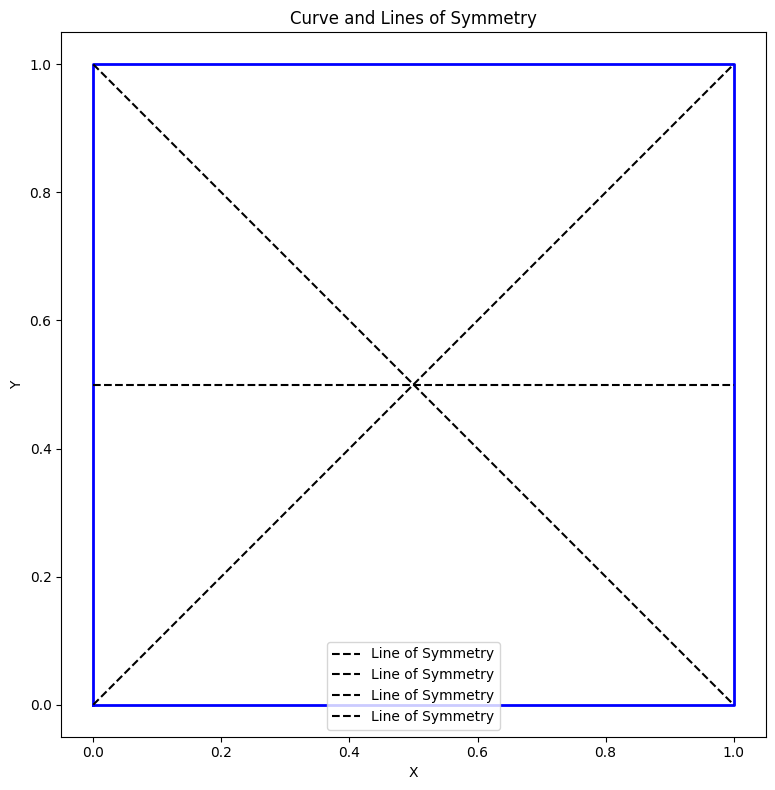

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to load points from CSV
def load_points_from_csv(file_path):
    df = pd.read_csv(file_path)
    if 'x' not in df.columns or 'y' not in df.columns:
        raise ValueError("CSV must contain 'x' and 'y' columns.")
    return df[['x', 'y']].values

# Function to plot the curves
def plot(paths_XYs, lines=None):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Different colors for different paths
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        ax.plot(XYs[:, 0], XYs[:, 1], c=c, linewidth=2)

    # Plot the lines of symmetry if provided
    if lines is not None:
        for line in lines:
            x_values = np.linspace(min(paths_XYs[0][:, 0]), max(paths_XYs[0][:, 0]), 100)
            y_values = (-line[0] * x_values - line[2]) / line[1]
            ax.plot(x_values, y_values, 'k--', label='Line of Symmetry')

    ax.set_aspect('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Curve and Lines of Symmetry')
    plt.show()

# Main execution
if __name__ == "__main__":
    file_path = 'square_points.csv'  # Path to your CSV file
    points = load_points_from_csv(file_path)

    # Assuming `paths_XYs` is a list of curves, where each curve is an array of points
    paths_XYs = [points]  # Here, we have just one curve

    # Define lines of symmetry for a square
    # Vertical line: x = 0.5 (assuming the square is centered at (0.5, 0.5))
    # Horizontal line: y = 0.5
    # Diagonal lines: y = x and y = -x
    lines_of_symmetry = [
        [1, 0, -0.5],  # Vertical line of symmetry
        [0, 1, -0.5],  # Horizontal line of symmetry
        [1, -1, 0],    # Diagonal line of symmetry (y = x)
        [1, 1, -1]      # Diagonal line of symmetry (y = -x)
    ]

    # Plot the original curve and lines of symmetry
    plot(paths_XYs, lines_of_symmetry)


Automatic line of symmetry detection


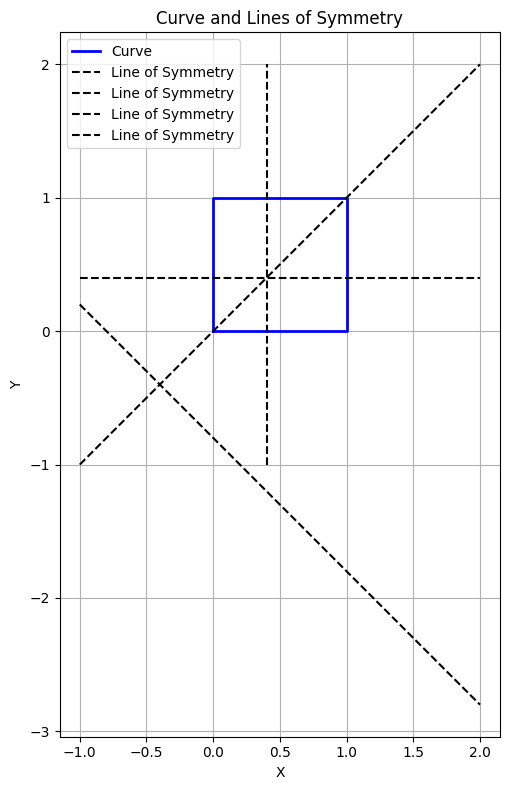

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def find_all_symmetry_lines(points):
    """
    Find all potential lines of symmetry based on the given points.
    """
    x_coords = points[:, 0]
    y_coords = points[:, 1]

    lines = []

    # Vertical and Horizontal Lines
    vertical_line = np.mean(x_coords)
    horizontal_line = np.mean(y_coords)

    lines.append([1, 0, -vertical_line])  # Vertical line x = mean(x)
    lines.append([0, 1, -horizontal_line]) # Horizontal line y = mean(y)

    # Diagonal Lines
    diagonal1_slope = 1  # y = x
    diagonal2_slope = -1 # y = -x

    # For y = x, compute the intercept
    diagonal1_intercept = np.mean(y_coords - x_coords)
    lines.append([1, -1, diagonal1_intercept])

    # For y = -x, compute the intercept
    diagonal2_intercept = np.mean(y_coords + x_coords)
    lines.append([1, 1, diagonal2_intercept])

    return lines

def plot(points, lines):
    """
    Plot the given points and the detected lines of symmetry.
    """
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))

    # Plot the curve
    ax.plot(points[:, 0], points[:, 1], 'b-', linewidth=2, label='Curve')

    # Determine the bounds for the plot
    x_min, x_max = np.min(points[:, 0]), np.max(points[:, 0])
    y_min, y_max = np.min(points[:, 1]), np.max(points[:, 1])
    x_range = x_max - x_min
    y_range = y_max - y_min

    # Extend the bounds a bit for clarity
    x_bounds = [x_min - 1, x_max + 1]
    y_bounds = [y_min - 1, y_max + 1]

    # Check and plot symmetry lines
    for line in lines:
        a, b, c = line
        if b != 0:
            x_values = np.linspace(x_bounds[0], x_bounds[1], 100)
            y_values = (-a * x_values - c) / b
        elif a != 0:
            y_values = np.linspace(y_bounds[0], y_bounds[1], 100)
            x_values = - (b * y_values + c) / a
        else:
            continue

        ax.plot(x_values, y_values, 'k--', label='Line of Symmetry')

    ax.set_aspect('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Curve and Lines of Symmetry')
    plt.grid(True)
    plt.show()

# Example points for a square
square_points = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]
])

# Find potential lines of symmetry
lines_of_symmetry = find_all_symmetry_lines(square_points)

# Plot the square and lines of symmetry
plot(square_points, lines_of_symmetry)


Further Optimization

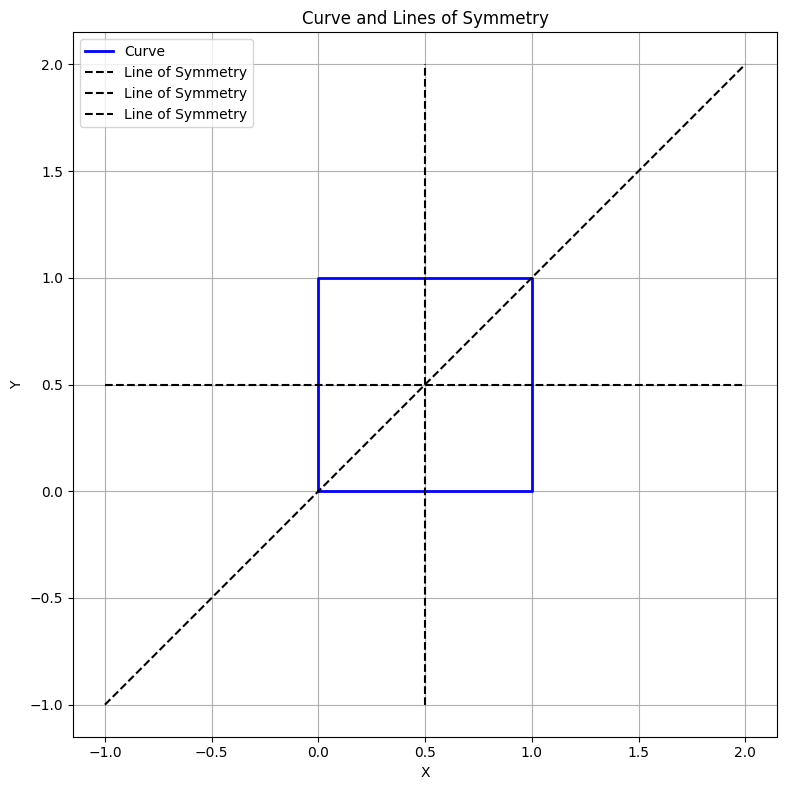

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def generate_candidate_lines(points):
    """
    Generate candidate lines of symmetry based on points.
    """
    x_coords = points[:, 0]
    y_coords = points[:, 1]

    lines = []

    mid_x = (np.max(x_coords) + np.min(x_coords)) / 2
    mid_y = (np.max(y_coords) + np.min(y_coords)) / 2

    lines.append([1, 0, -mid_x])
    lines.append([0, 1, -mid_y])

    lines.append([1, -1, 0])
    lines.append([1, 1, 0])

    return lines

def reflect_points(line, points):
    """
    Reflect points across the given line.
    """
    a, b, c = line
    reflected_points = []
    for x, y in points:
        if a == 0:  # Vertical line (x = constant)
            reflected_x = x
            reflected_y = -y + 2 * (-c / b)
        elif b == 0:  # Horizontal line (y = constant)
            reflected_x = -x + 2 * (-c / a)
            reflected_y = y
        else:
            denom = a**2 + b**2
            reflected_x = x - 2 * a * (a * x + b * y + c) / denom
            reflected_y = y - 2 * b * (a * x + b * y + c) / denom

        reflected_points.append([reflected_x, reflected_y])

    return np.array(reflected_points)

def check_symmetry(points, lines):
    """
    Check which lines are true lines of symmetry.
    """
    symmetry_lines = []
    points_set = set(map(tuple, points.astype(float)))
    for line in lines:
        reflected_points = reflect_points(line, points)
        reflected_points_set = set(map(tuple, reflected_points.astype(float)))

        if points_set == reflected_points_set:
            symmetry_lines.append(line)

    return symmetry_lines

def plot(points, symmetry_lines):
    """
    Plot the points and the detected lines of symmetry.
    """
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))

    # Plot the curve
    ax.plot(points[:, 0], points[:, 1], 'b-', linewidth=2, label='Curve')

    # Determine the bounds for the plot
    x_min, x_max = np.min(points[:, 0]), np.max(points[:, 0])
    y_min, y_max = np.min(points[:, 1]), np.max(points[:, 1])
    x_range = x_max - x_min
    y_range = y_max - y_min

    # Extend the bounds a bit for clarity
    x_bounds = [x_min - 1, x_max + 1]
    y_bounds = [y_min - 1, y_max + 1]

    # Check and plot symmetry lines
    for line in symmetry_lines:
        a, b, c = line
        if b != 0:
            x_values = np.linspace(x_bounds[0], x_bounds[1], 100)
            y_values = (-a * x_values - c) / b
        elif a != 0:
            y_values = np.linspace(y_bounds[0], y_bounds[1], 100)
            x_values = - (b * y_values + c) / a
        else:
            continue

        ax.plot(x_values, y_values, 'k--', label='Line of Symmetry')

    ax.set_aspect('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Curve and Lines of Symmetry')
    plt.grid(True)
    plt.show()

# Example points for a square
square_points = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]
])

# Generate candidate lines
candidate_lines = generate_candidate_lines(square_points)

# Check which lines are symmetry lines
lines_of_symmetry = check_symmetry(square_points, candidate_lines)

# Plot the curve and detected lines of symmetry
plot(square_points, lines_of_symmetry)
